In [1]:
import pandas as pd

In [3]:
df=pd.read_csv('D:\CVPR\data.csv')

In [4]:
df


,X1,X2,y
0,34,11,0
1,66,76,1
2,22,46,0
3,41,82,1
4,8,12,0
...,...,...,...
94,44,45,1
95,69,83,0
96,51,16,1
97,32,71,1


In [5]:
X1=df['X1'].values.tolist()
X2=df['X2'].values.tolist()
y=df['y'].values.tolist()
print(X1)
print(X2)
print(y)

[34, 66, 22, 41, 8, 37, 25, 63, 96, 11, 91, 73, 44, 68, 18, 97, 55, 16, 51, 76, 50, 35, 61, 5, 92, 2, 92, 32, 99, 24, 50, 34, 86, 75, 95, 26, 63, 6, 94, 82, 28, 7, 7, 13, 27, 12, 59, 92, 61, 11, 33, 52, 24, 93, 73, 56, 48, 77, 30, 52, 81, 41, 22, 96, 19, 22, 32, 40, 44, 44, 21, 88, 6, 99, 89, 30, 53, 40, 28, 91, 3, 72, 20, 8, 48, 92, 34, 66, 17, 5, 42, 78, 44, 1, 44, 69, 51, 32, 68]
[11, 76, 46, 82, 12, 95, 10, 85, 69, 37, 21, 56, 95, 4, 38, 12, 45, 37, 17, 85, 82, 6, 98, 98, 22, 5, 51, 75, 99, 69, 59, 92, 13, 75, 62, 20, 54, 24, 25, 32, 51, 95, 31, 96, 11, 55, 47, 39, 97, 51, 49, 16, 85, 64, 2, 77, 35, 13, 86, 58, 7, 55, 19, 13, 59, 1, 9, 24, 92, 91, 61, 41, 20, 18, 22, 86, 7, 20, 70, 67, 40, 2, 75, 5, 46, 76, 6, 17, 1, 36, 42, 94, 96, 92, 45, 83, 16, 71, 65]
[0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 

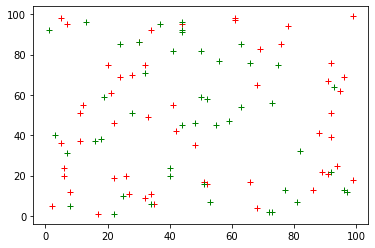

In [6]:
import matplotlib.pyplot as plt

X1=df['X1'].values.tolist()
X2=df['X2'].values.tolist()
y=df['y'].values.tolist()
for i in range(len(y)):
    if y[i]==0:
        plt.plot(X1[i],X2[i], "r+")
    else:
        plt.plot(X1[i],X2[i],"g+")


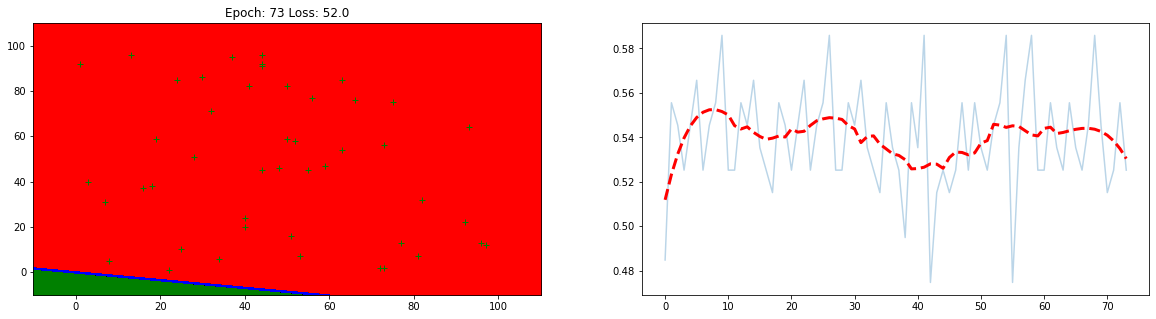

Epoch: 73 Loss: 0.5252525252525253


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math
from IPython import display
from scipy.signal import savgol_filter


W = [random.random(), random.random()]
b = random.random()

# W = [random.uniform(-1,1), random.uniform(-1,1)]
# b = random.uniform(-1,1)

lr = 0.1
theta=0.5

epoch = 0
count = 0


loss = []

while count < len(X1):
    
    total_error = 0
    for i in range(len(X1)):
        weighted_sum = W[0]*X1[i] + W[1]*X2[i] + b
        pred = 0
        if weighted_sum > theta:
            pred = 1

        error =  y[i] - pred
        if error != 0:
            count = 0
            total_error += math.sqrt(error**2)
            
            W[0] += lr * error * X1[i]
            W[1] += lr * error * X2[i]
            b    += lr * error
        else:
            count += 1
    
    loss.append(1/len(X1)*total_error)
    
    plt.figure(figsize=(20,5))
    #loss.append([epoch, total_error])   
    display.clear_output(wait=True)
    plt.subplot(1,2,1)
    

    for i in range(len(y)):
        if y[i] == 0:
            plt.plot(X1[i], X2[i], "r+")
            
        else:
            plt.plot(X1[i], X2[i], "g+")
            
            

        plt.xlim([-10, 110])
        plt.ylim([-10, 110])
        

        xintr=(theta-b)/W[0]
        yintr=(theta-b)/W[1]

        slope = -yintr/xintr
        xx = plt.xlim()
#                 print(xx)
        yeq = []
        for x in xx:
            f=yeq.append(slope*x+yintr)
        plt.plot(xx,yeq, 'b-')
        plt.fill_between(xx, yeq,plt.xlim()[0], color='green')
        plt.fill_between(xx, yeq, plt.ylim()[1],color='red')
        
        
        

    plt.title(f"Epoch: {epoch} Loss: {total_error}")

    plt.subplot(1,2,2)
    
    plt.plot(loss, alpha=0.3)
    if epoch > 20:
        yhat = savgol_filter(loss, 21, 3) # window size 51, polynomial order 3
        plt.plot(yhat, 'r--', lw=3)

    plt.show()
            
    print(f"Epoch: {epoch} Loss: {loss[-1]}")
    epoch += 1